In [177]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import KDTree
from design_policy import *

In [178]:
#Problem 1: Given n, sampling uniformly from the n-simplex

In [179]:
N_nodes = 10 #Number of node networks
world_size = 10 #Number of possible states of the world (in this case = N_nodes)
exp_av = 10 #Number of possible experiments at each timestep (in this case = N_nodes)
tsteps = 10 #Number of timesteps, we count them as 0...n-1
mesh_points = 1000 #Number of samples of the probability simplex
sensitivity = 0.99 #Probability you find the RW in the node you are looking for, provided that is is there. 
specificity = 0.97 #Probability you don't find the RW in the node you are looking for, provided it is not there

In [180]:
def sample_simplex(dimension, n_points):
    return np.random.dirichlet([1]*dimension, size = n_points)

In [181]:
sample_simplex(3,2)

array([[0.73683189, 0.11436849, 0.14879962],
       [0.58427506, 0.18105704, 0.2346679 ]])

In [182]:
ExperimentsRW = []
#Modelling decision: The experiments have a fixed sensitivty and specificity about finding node i
for i in range(N_nodes): #i-th matrix: Experiment test node i
    M = np.zeros((N_nodes, N_nodes))
    for j in range(N_nodes):
        for k in range(N_nodes):
            if j == k:
                if j == i:
                    M[j,k] = sensitivity
                else:
                    M[j,k] = specificity
            else:
                if k == i:
                    M[j,k] = (1-sensitivity)/(N_nodes-1)
                else:
                    M[j,k] = (1-specificity)/(N_nodes-1)
    ExperimentsRW.append(M)

In [183]:
ExperimentsRW[4].sum(axis = 0)
ExperimentsRW[2]

array([[0.97      , 0.00333333, 0.00111111, 0.00333333, 0.00333333,
        0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333],
       [0.00333333, 0.97      , 0.00111111, 0.00333333, 0.00333333,
        0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333],
       [0.00333333, 0.00333333, 0.99      , 0.00333333, 0.00333333,
        0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333],
       [0.00333333, 0.00333333, 0.00111111, 0.97      , 0.00333333,
        0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333],
       [0.00333333, 0.00333333, 0.00111111, 0.00333333, 0.97      ,
        0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333],
       [0.00333333, 0.00333333, 0.00111111, 0.00333333, 0.00333333,
        0.97      , 0.00333333, 0.00333333, 0.00333333, 0.00333333],
       [0.00333333, 0.00333333, 0.00111111, 0.00333333, 0.00333333,
        0.00333333, 0.97      , 0.00333333, 0.00333333, 0.00333333],
       [0.00333333, 0.00333333, 0.0011111

In [190]:
grid = sample_simplex(2, 3)
NNTree = KDTree(data= grid)
NN_index = lambda x: NNTree.query(x)[1]
NN_index(0.1*np.ones(10))

651

In [185]:
def Random_walk_dynamics(G):
    aux = np.array(nx.adjacency_matrix(G).todense())
    return aux/aux.sum(axis=1, keepdims=True)

In [186]:
G = nx.erdos_renyi_graph(N_nodes, .2)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(N_nodes, .2)

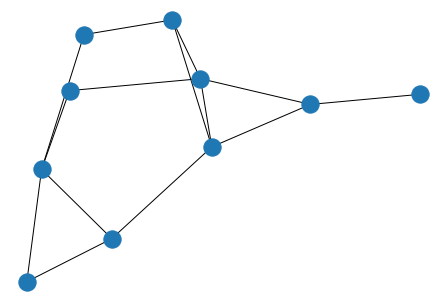

In [187]:
nx.draw(G)

In [188]:
trans_matrix = Random_walk_dynamics(G)

In [177]:
experiment = ExperimentsRW[1]

In [178]:
prior = [0.1]*8 + [0.15, 0.05]

In [184]:
Ptest = experiment@prior

In [219]:
np.multiply(experiment[4,:], prior)/Ptest[4]

array([0.00334076, 0.00111359, 0.00334076, 0.00334076, 0.97216036,
       0.00334076, 0.00334076, 0.00334076, 0.00501114, 0.00167038])

In [181]:
P = np.vstack([prior]*experiment.shape[0]).T

In [235]:
from scipy.stats import entropy
def dKL(prior, posterior):
    return entropy(posterior, prior, base = 2)

def reward(time, prior, experiment): #This should be a class and the example here just one instance
    #Experiment is a |S|x|Θ| matrix
    #Prior a |Θ| vector
    #Time = number of experiments done *before* this
    if time < tsteps-1:
        return 0
    Ptest = experiment@prior
    Posterior = np.divide(np.multiply(experiment, prior),Ptest.reshape(-1,1))
    return sum([Ptest[i]*dKL(prior, Posterior[i,:]) for i in range(experiment.shape[0])])
    
        

In [243]:
V = np.random.random(size = (N_nodes, tsteps))
convergence_criterion = False
while not convergence_criterion:
    pass

KeyboardInterrupt: 